In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_results = pd.read_csv("/results/full_norm_stats.csv", index_col=0)

In [5]:
df_results

,key,mse_A549,mse_K562,mse_MCF7,css_A549,css_K562,css_MCF7,r2_A549,r2_K562,r2_MCF7,...,rank_logfc_MCF7,edistance_A549,edistance_K562,edistance_MCF7,logfc_corr_A549,logfc_corr_K562,logfc_corr_MCF7,top_logfc_corr_A549,top_logfc_corr_K562,top_logfc_corr_MCF7
0,null_rawcount,0.031749,0.010479,0.121711,0.949273,0.946543,0.953681,0.864244,0.841639,0.876907,...,0.486486,119.250170,39.357768,457.147316,0.295812,0.254656,0.240503,0.195331,0.117801,0.213440
1,mean_rawcount,0.027188,0.008537,0.100280,0.957453,0.958400,0.962424,0.890718,0.874651,0.895133,...,0.500000,102.117501,32.066392,376.653509,0.471487,0.497378,0.507627,0.574262,0.464673,0.500899
2,decoder_rawcount,0.022887,0.009095,0.069354,0.967558,0.954882,0.977121,0.902646,0.868443,0.926623,...,0.479730,85.965161,34.158945,260.492063,0.448192,0.457125,0.442449,0.548218,0.396243,0.478356
3,mlp_rawcount,0.025554,0.008426,0.078969,0.962482,0.955698,0.974945,0.896791,0.879521,0.922497,...,0.435435,95.981361,31.649390,296.607451,0.431892,0.433839,0.439343,0.541698,0.372165,0.490143
4,prnet_rawcount,0.077922,0.054083,0.190415,0.824502,0.581592,0.951292,0.601560,0.259664,0.822984,...,0.494745,292.675643,203.135959,715.197489,0.389052,0.406760,0.446321,0.442493,0.384343,0.396863
5,null_cpm,0.087423,0.066707,0.060513,0.956441,0.950774,0.966319,0.888060,0.861526,0.919860,...,0.481231,328.361973,250.550363,227.285946,0.297959,0.255825,0.242604,0.203167,0.147025,0.181642
6,mean_cpm,0.063718,0.045799,0.048844,0.967089,0.965232,0.972211,0.918139,0.900936,0.935028,...,0.500000,239.324189,172.020477,183.459173,0.465454,0.491139,0.505213,0.573701,0.455599,0.495971
7,decoder_cpm,0.055019,0.051846,0.043776,0.971538,0.965412,0.976710,0.930451,0.898675,0.942917,...,0.412162,206.649856,194.734667,164.422248,0.471654,0.481748,0.473624,0.500233,0.485421,0.487464
8,mlp_cpm,0.045532,0.036331,0.032159,0.976387,0.971640,0.981467,0.942737,0.926386,0.958154,...,0.421922,171.017591,136.460923,120.788543,0.566667,0.554882,0.542383,0.615848,0.384954,0.471242
9,prnet_cpm,0.176847,0.123139,0.174665,0.917621,0.906520,0.925394,0.778819,0.764661,0.778058,...,0.497748,664.238554,462.510185,656.041814,0.408022,0.439061,0.449206,0.501259,0.406719,0.451209


In [10]:
def plot_normmethod(df_results, metric):
    df = df_results[['key', f'{metric}_A549', f'{metric}_K562', f'{metric}_MCF7']]
    df['norm_method'] = [x.split("_")[1] for x in df['key']]
    df['model_name'] = [x.split("_")[0] for x in df['key']]
    df[f'{metric}_avg'] = df[[f'{metric}_A549', f'{metric}_K562', f'{metric}_MCF7']].mean(axis=1)

    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=df,
        x="model_name",
        y=f"{metric}_avg",
        hue="norm_method",
    )
    plt.ylabel(f"{metric}")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.legend(title="Normalization", loc='lower left')
    plt.tight_layout()
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_19568\3781278582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_method'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_19568\3781278582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_19568\3781278582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

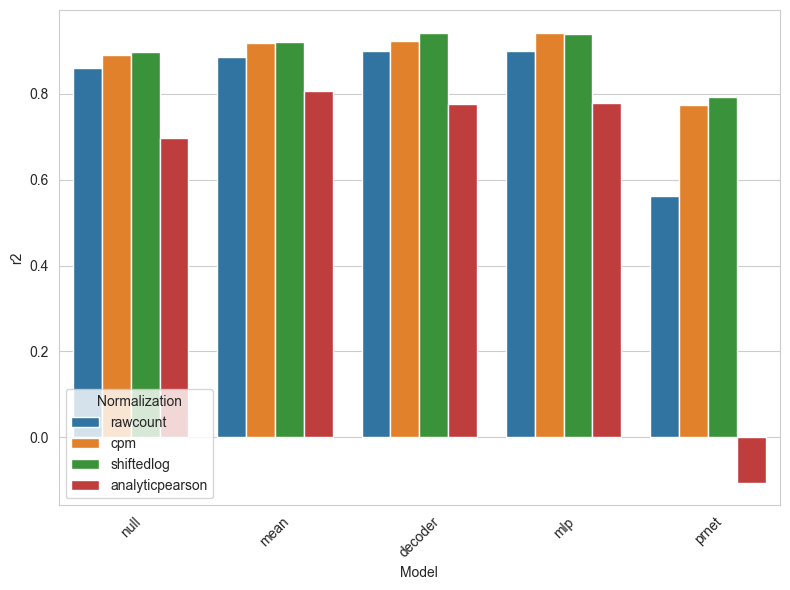

In [11]:
plot_normmethod(df_results, 'r2')

C:\Users\admin\AppData\Local\Temp\ipykernel_19568\3781278582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_method'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_19568\3781278582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_19568\3781278582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

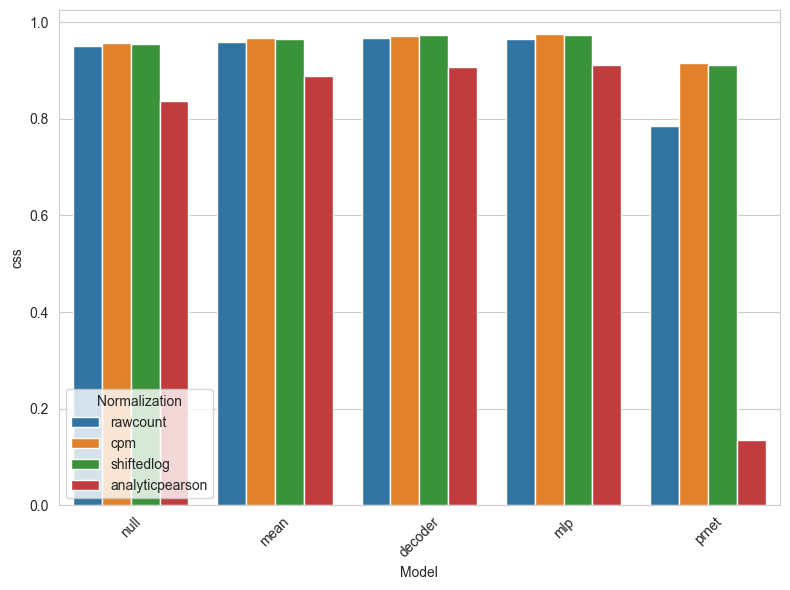

In [12]:
plot_normmethod(df_results, 'css')

In [39]:
df_r2 = df_results[['key', 'r2_A549', 'r2_K562', 'r2_MCF7']]
df_r2['norm_method'] = [x.split("_")[1] for x in df_r2['key']]
df_r2['model_name'] = [x.split("_")[0] for x in df_r2['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_7620\2807799515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r2['norm_method'] = [x.split("_")[1] for x in df_r2['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_7620\2807799515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r2['model_name'] = [x.split("_")[0] for x in df_r2['key']]


In [40]:
df_melted = df_r2.melt(
    id_vars=["norm_method", "model_name"],
    value_vars=["r2_A549", "r2_K562", "r2_MCF7"],
    var_name="cell_type",
    value_name="r2_score"
)

df_melted["cell_type"] = df_melted["cell_type"].str.replace("r2_", "")

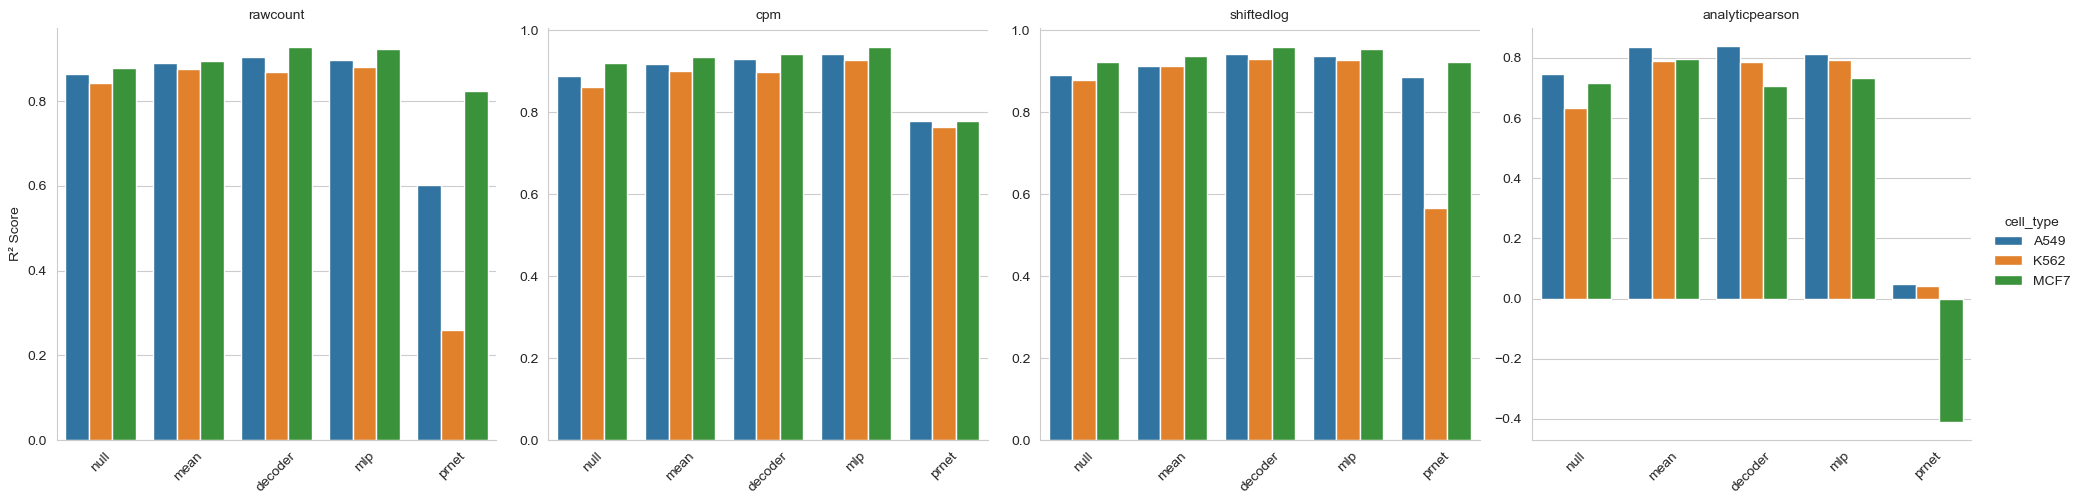

In [41]:
g = sns.catplot(
    data=df_melted,
    x="model_name",
    y="r2_score",
    hue="cell_type",
    col="norm_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False
)
g.set_titles("{col_name}")
g.set_axis_labels("", "R² Score")
g.set_xticklabels(rotation=45)
plt.show()

In [42]:
df_edist = df_results[['key', 'edistance_A549', 'edistance_K562', 'edistance_MCF7']]
df_edist['norm_method'] = [x.split("_")[1] for x in df_edist['key']]
df_edist['model_name'] = [x.split("_")[0] for x in df_edist['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_7620\843225047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edist['norm_method'] = [x.split("_")[1] for x in df_edist['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_7620\843225047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edist['model_name'] = [x.split("_")[0] for x in df_edist['key']]


In [43]:
df_melted = df_edist.melt(
    id_vars=["norm_method", "model_name"],
    value_vars=["edistance_A549", "edistance_K562", "edistance_MCF7"],
    var_name="cell_type",
    value_name="edistance"
)

df_melted["cell_type"] = df_melted["cell_type"].str.replace("edistance_", "")

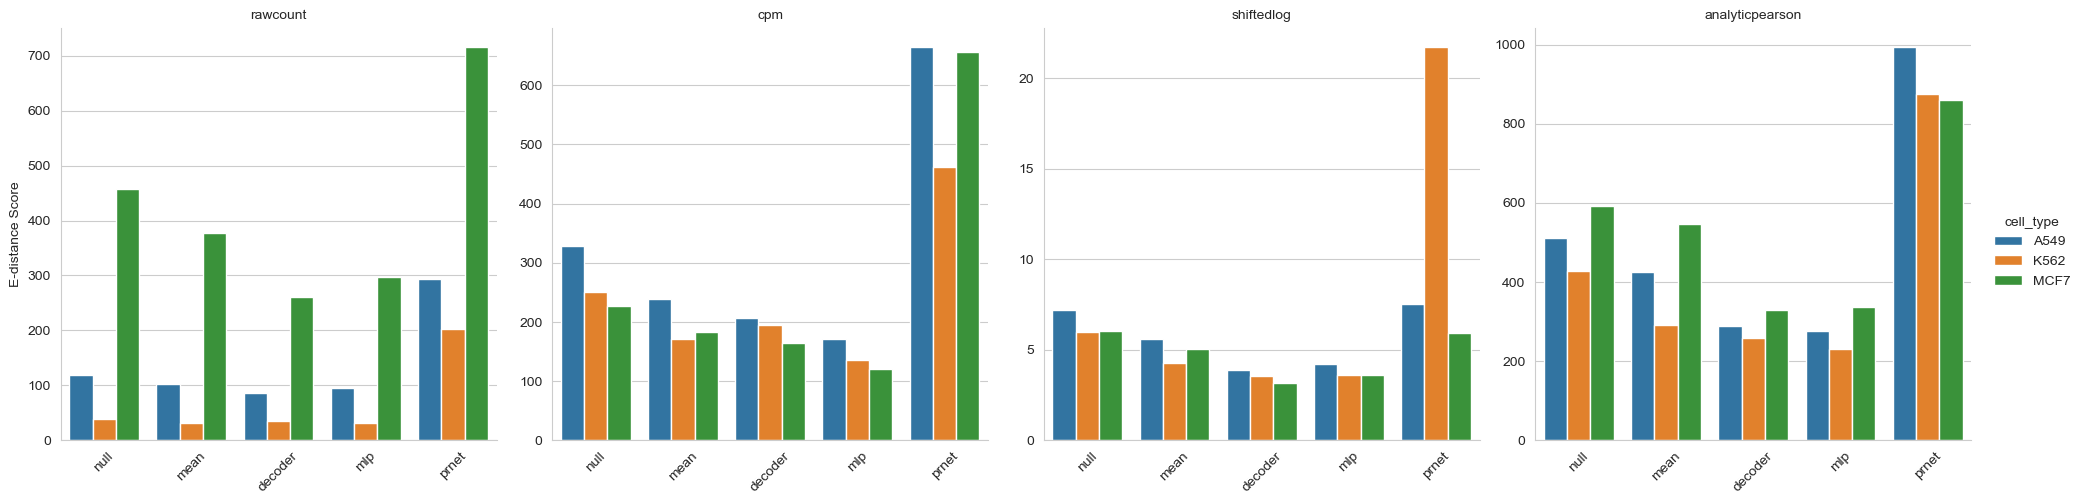

In [44]:
g = sns.catplot(
    data=df_melted,
    x="model_name",
    y="edistance",
    hue="cell_type",
    col="norm_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "E-distance Score")
g.set_xticklabels(rotation=45)
plt.show()

In [45]:
df_mse = df_results[['key', 'mse_A549', 'mse_K562', 'mse_MCF7']]
df_mse['norm_method'] = [x.split("_")[1] for x in df_mse['key']]
df_mse['model_name'] = [x.split("_")[0] for x in df_mse['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_7620\2321327484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mse['norm_method'] = [x.split("_")[1] for x in df_mse['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_7620\2321327484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mse['model_name'] = [x.split("_")[0] for x in df_mse['key']]


In [46]:
df_melted = df_mse.melt(
    id_vars=["norm_method", "model_name"],
    value_vars=["mse_A549", "mse_K562", "mse_MCF7"],
    var_name="cell_type",
    value_name="mse"
)

df_melted["cell_type"] = df_melted["cell_type"].str.replace("mse_", "")

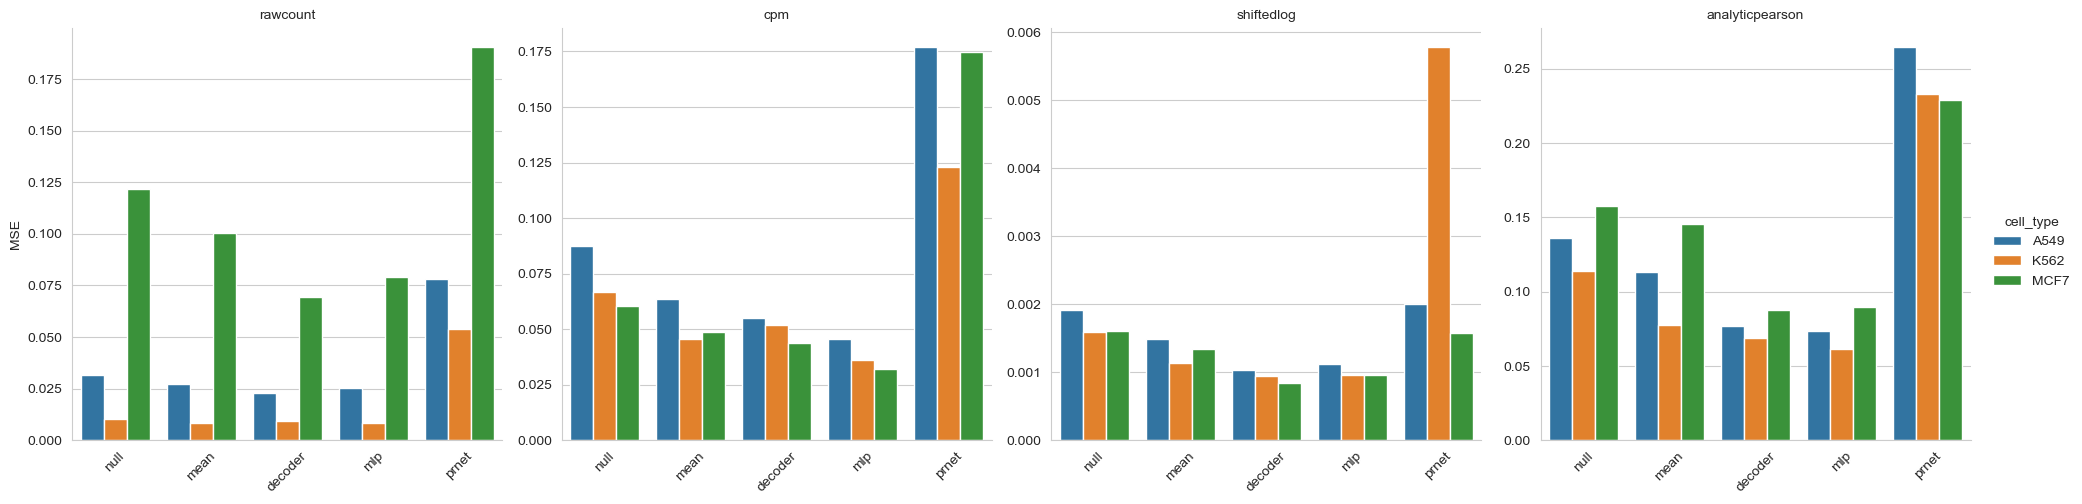

In [47]:
g = sns.catplot(
    data=df_melted,
    x="model_name",
    y="mse",
    hue="cell_type",
    col="norm_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "MSE")
g.set_xticklabels(rotation=45)
plt.show()

In [48]:
df_css = df_results[['key', 'css_A549', 'css_K562', 'css_MCF7']]
df_css['norm_method'] = [x.split("_")[1] for x in df_css['key']]
df_css['model_name'] = [x.split("_")[0] for x in df_css['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_7620\2884679928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_css['norm_method'] = [x.split("_")[1] for x in df_css['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_7620\2884679928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_css['model_name'] = [x.split("_")[0] for x in df_css['key']]


In [49]:
df_melted = df_css.melt(
    id_vars=["norm_method", "model_name"],
    value_vars=["css_A549", "css_K562", "css_MCF7"],
    var_name="cell_type",
    value_name="css"
)

df_melted["cell_type"] = df_melted["cell_type"].str.replace("css_", "")

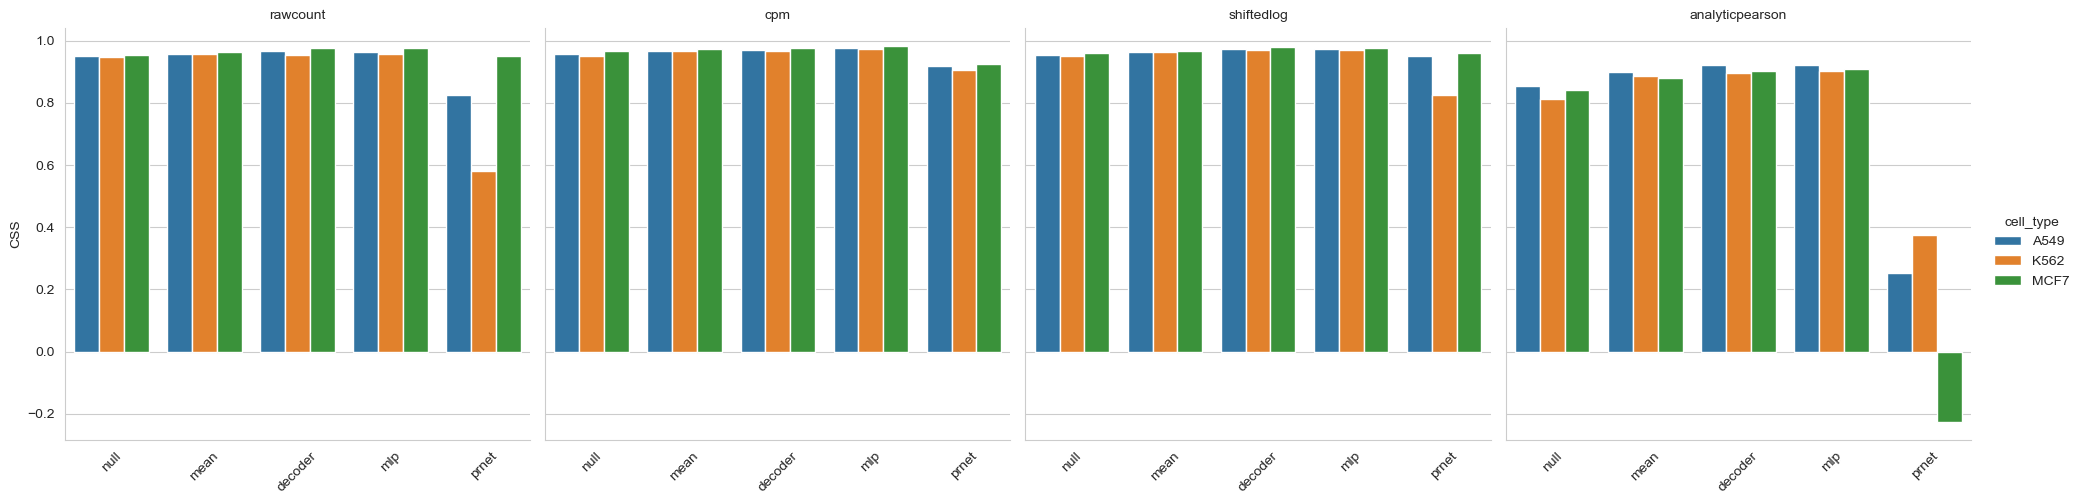

In [50]:
g = sns.catplot(
    data=df_melted,
    x="model_name",
    y="css",
    hue="cell_type",
    col="norm_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=True,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "CSS")
g.set_xticklabels(rotation=45)
plt.show()